In [1]:
import pandas as pd
# Package imports
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import neighbors
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier


c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
declinedata=pd.read_csv('CleanedDeclineddata.csv')
loandata=pd.read_csv('CleanedLoandata.csv',encoding="ISO-8859-1")

c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\python27\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (14,41,51,110,121,122,123,126,127,128,131,137,138,139,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
declinedataforclassification=declinedata[['amount_requested','Risk_Score','dti','State','emp_length','policy_code','app_month']]

In [4]:
loandataforclassification=loandata[['loan_amnt','Risk_Score','dti','addr_state','emp_length','policy_code','issue_month']]

In [5]:
loandataforclassification=loandataforclassification.rename(columns={'loan_amnt':'amount_requested','addr_state':'State','issue_month':'app_month'})

In [6]:
declinedataforclassification['status']=0
loandataforclassification['status']=1

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
loandataforclassification['amount_requested']=loandataforclassification['amount_requested'].astype(float)


In [8]:
resultdata = loandataforclassification.append(declinedataforclassification,ignore_index=True)

In [9]:
train, test = train_test_split(resultdata, train_size = 0.7)

In [10]:
train_y = train['status']
test_y = test['status']
train_x = train.loc[:, train.columns != 'status']
test_x = test.loc[:, test.columns != 'status']

('Intercept:  ', array([-4.92246945]))
('Coefficient:  ', array([[ -4.72677766e-05,   4.20222325e-03,  -3.46732382e-02,
         -2.68847478e-02,   1.13041995e-01,   6.91846826e+00,
         -8.24900120e-02]]))
[[11261575    30726]
 [     853  1151589]]
0.997462462664


c:\python27\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


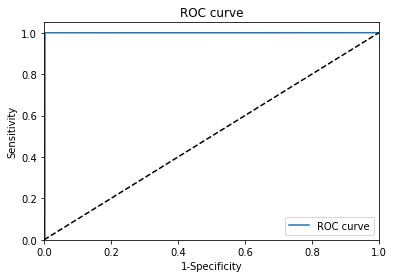

[[4825910   13221]
 [    341  493990]]
0.997457186345


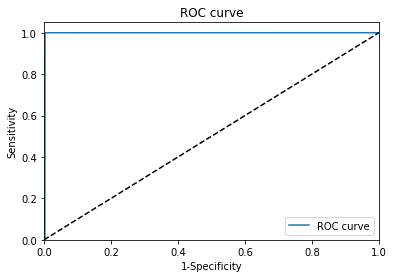

In [11]:
logistic=LogisticRegression()
logistic.fit(train_x,train_y)
print("Intercept:  ",logistic.intercept_)
print("Coefficient:  ",logistic.coef_)


trainpred=logistic.predict(train_x)
traincm=confusion_matrix(train_y, trainpred)
print(traincm)
print(accuracy_score(train_y, trainpred))

trainpreds = logistic.predict_proba(train_x)[:,1]
fpr, tpr, _ = roc_curve(train_y, trainpreds)
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()






pred=logistic.predict(test_x)
cm=confusion_matrix(test_y, pred)
print(cm)
print(accuracy_score(test_y, pred))

preds = logistic.predict_proba(test_x)[:,1]
fpr, tpr, _ = roc_curve(test_y, preds)
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()



[[11292301        0]
 [       0  1152442]]
1.0


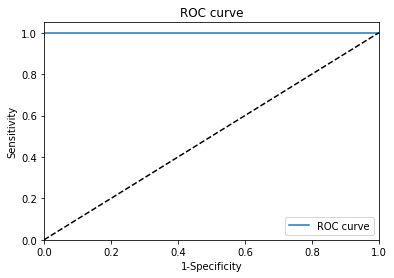

[[4839131       0]
 [      0  494331]]


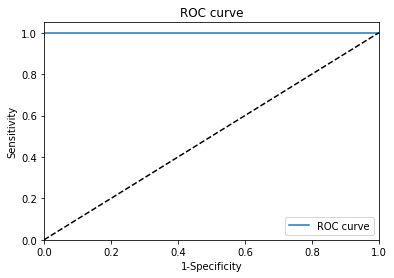

1.0


In [12]:

rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_x, train_y)



trainpred=rf.predict(train_x)
traincm=confusion_matrix(train_y, trainpred)
print(traincm)
print(accuracy_score(train_y, trainpred))

trainpreds = rf.predict_proba(train_x)[:,1]
fpr, tpr, _ = roc_curve(train_y, trainpreds)
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


preds = rf.predict_proba(test_x)[:,1]
pred=rf.predict(test_x)

cm=confusion_matrix(test_y, pred)
print(cm)


fpr, tpr, _ = roc_curve(test_y, pred)
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print(accuracy_score(test_y, pred))

In [13]:
#taking sample data for neural networks otherwise it gives you the memory error
sampledecline=declinedataforclassification.sample(n=10000)
sampleloan=loandataforclassification.sample(n=10000)
resultsampledata = sampleloan.append(sampledecline,ignore_index=True)
train, test = train_test_split(resultdata, train_size = 0.7)
train_y = train['status']
test_y = test['status']
train_x = train.loc[:, train.columns != 'status']
test_x = test.loc[:, test.columns != 'status']

Accuracy on the training subset :0.998110
[[11272091    20032]
 [    3492  1149128]]


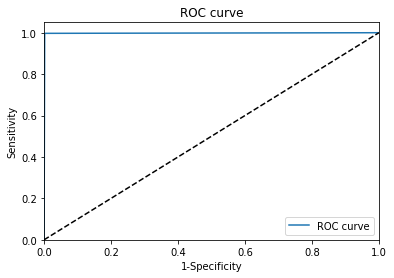

Accuracy on the training subset :0.998105
[[4830669    8640]
 [   1467  492686]]


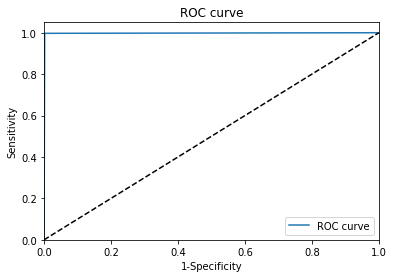

In [15]:
mlp=MLPClassifier(max_iter=100,random_state=42,early_stopping=True,hidden_layer_sizes=10)
mlp.fit(train_x,train_y)



pred=mlp.predict(train_x)
print('Accuracy on the training subset :{:3f}'.format(mlp.score(train_x,train_y)))
cm=confusion_matrix(train_y, pred)
print(cm)
fpr, tpr, _ = roc_curve(train_y, pred)
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


pred=mlp.predict(test_x)
print('Accuracy on the training subset :{:3f}'.format(mlp.score(test_x,test_y)))
cm=confusion_matrix(test_y, pred)
print(cm)
fpr, tpr, _ = roc_curve(test_y, pred)
#Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()